# Fourier Transform
In this example we will demonstrate the fourier transform using wind speeds. The Fast Fourier Algorithm is typically used in characterizing sound waves. It is among the most common and useful time series algorithm and has a natural place in the Raven toolset. The implementation of the Fourier algorithm can be found in the Fourier.py file in the TSA folder.

# Fast Fourier Algorithm

Below is a visual representation of the Fast Fourier Algorithm. As said before this can be used for characterizing sound waves.

$ X_{k} =\sum \limits_{n=0} ^{N-1} x_{n}e^{-i2 \pi kn/N} $

# Fast Fourier in Raven

Below is code used to filter data and graph the data for Raven. The data is first filtered to ensure that the correct number of parameters are passed into Raven. After this the data is input into Raven. We then take the data from Raven and graph it next to the original data. The original data can be seen in red and the Raven prediction can be seen in Blue. It's important to remember that when writing the xml file for the Raven input that the Fast Fourier Transform takes periods to better fit the data. Because of these periods it may be worthwhile to determine the important points in the data by first graphing the original data, then pass the peaks and valleys in the graph as the period values.

In [5]:
%%capture
#Import the needed libraries.
import pandas as pd
import numpy as np

In [6]:
#Read the original dataset
data = pd.read_csv("raw_data/OriginalDataset.csv")

In [7]:
#Filter the data into Active power and wind speed columns.
dataLatest = data[['LV ActivePower (kW)','Wind Speed (m/s)']]

# WindInput
After filtering the data we place the data into a csv file that can be copied into the Raven input csv.

In [8]:
#Filter the data to 145 lines and put the data into the input file for Raven.
df = dataLatest.iloc[0:144]
df.to_csv('raw_data/WindInput.csv')

In [9]:
#import the library needed to create the graph.
import matplotlib.pyplot as plt

# Wind Output
After passing the input into Raven and running Raven, we can put the output file into our graph. The data is shown below with the original data represented in Red and the Raven Data represented in blue. Another important feature to remember in Fourier is that the graph is highly dependant on the periods that are entered make sure that the periods reflect the peaks and valleys in the data for the best fit.

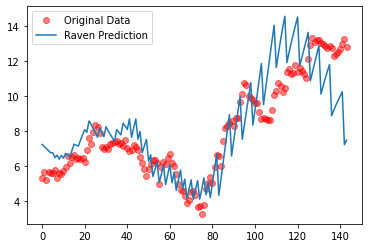

In [12]:
#Graph the results from Raven and the original data.
y = df['Wind Speed (m/s)']

dat = pd.read_csv('raw_data/WindOutput.csv')

plt.plot(dat.seconds, y, 'o', alpha=0.5, color='red', label="Original Data")
plt.plot(dat.seconds, dat .signal2, label="Raven Prediction")
plt.legend(loc='upper left')